Author :
* Jonathan NGALAMULUME KALONJI
* Mat : 898477

PROJECT DESCRIPTION:
* Subject : Supervised Learning  for  Indoor Positioning System using Wifi Fingerprinting Methode
* Goals: implement a Machine Learning Model  and Deep Learning Model to predict object(user/phone) location(x,y Axis) using RSSI expecting  that the Deep Learning  model to be more accurate than the Machine Learning Model
* Dataset : https://www.kaggle.com/datasets/giantuji/UjiIndoorLoc/data
* Model to implemente :
1. Machine Learning model  RandomForestRegressor
2. Deep Learning Model 1D Convolution Neural Network (1DCNN)

In [1]:
!pip install tensorflow

import sklearn
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

In [2]:
#GOOGLE Cloud server connection for Data exploraton
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I. DATASET VISUALIZATION

In [3]:
#Training Dataset
Training_dataset = pd.read_csv('/content/drive/MyDrive/Ambient_Intelligent_IPS_Project/Dataset/TrainingData.csv')
Training_dataset.head(10)
#Training_dataset.shape

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.264300,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.621200,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.570400,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.143600,4.864982e+06,0,0,122,2,11,13,1369909710
5,100,100,100,100,100,100,100,100,100,100,...,100,-7533.896200,4.864939e+06,2,1,105,2,2,23,1371713841
6,100,100,100,100,100,100,100,100,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371713883
7,100,100,100,100,100,100,100,100,100,100,...,100,-7527.451100,4.864929e+06,2,1,101,2,2,23,1371713775
8,100,100,100,100,100,100,100,100,100,100,...,100,-7559.497300,4.864888e+06,2,1,112,2,2,23,1371714307
9,100,100,100,100,100,100,100,100,100,100,...,100,-7510.437173,4.864949e+06,2,1,103,1,2,23,1371714128


In [4]:
#Test Dataset
Test_Dataset = pd.read_csv('/content/drive/MyDrive/Ambient_Intelligent_IPS_Project/Dataset/ValidationData.csv')
Test_Dataset.head(10)
#Test_Dataset.shape

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774
5,100,100,100,100,100,100,100,100,100,100,...,100,-7338.807210,4.864825e+06,2,2,0,0,0,12,1380874853
6,100,100,100,100,100,100,100,100,100,100,...,100,-7379.351683,4.864849e+06,3,2,0,0,0,20,1380874982
7,100,100,100,100,100,100,100,100,100,100,...,100,-7340.558777,4.864759e+06,3,2,0,0,0,21,1380875085
8,100,100,100,100,100,100,100,100,100,100,...,100,-7357.531253,4.864766e+06,2,2,0,0,0,12,1380875092
9,100,100,100,100,100,100,100,100,100,100,...,100,-7345.085170,4.864831e+06,0,2,0,0,0,20,1380875118


In [5]:
#combine dataset
Final_Data =pd.concat([Training_dataset,Test_Dataset ])
Final_Data.head(5)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


I.EXPLORATORY DATA ANNALYSIS (EDA)
Dataset Summary Statistic :
Training Set

In [ ]:
print(Final_Data.describe())

             WAP001        WAP002        WAP003        WAP004        WAP005  \
count  21048.000000  21048.000000  21048.000000  21048.000000  21048.000000   
mean      99.760500     99.830388     99.982326     99.982326     99.634122   
std        6.811116      5.643191      1.813086      1.813165      8.385624   
min      -97.000000    -90.000000    -87.000000    -88.000000    -97.000000   
25%      100.000000    100.000000    100.000000    100.000000    100.000000   
50%      100.000000    100.000000    100.000000    100.000000    100.000000   
75%      100.000000    100.000000    100.000000    100.000000    100.000000   
max      100.000000    100.000000    100.000000    100.000000    100.000000   

             WAP006        WAP007        WAP008        WAP009        WAP010  \
count  21048.000000  21048.000000  21048.000000  21048.000000  21048.000000   
mean      97.281927     95.011640     93.845401     94.480758     99.145192   
std       22.327658     29.747638     32.964914    

I.1 FEATURE ANALYSIS :
* Features Distribution

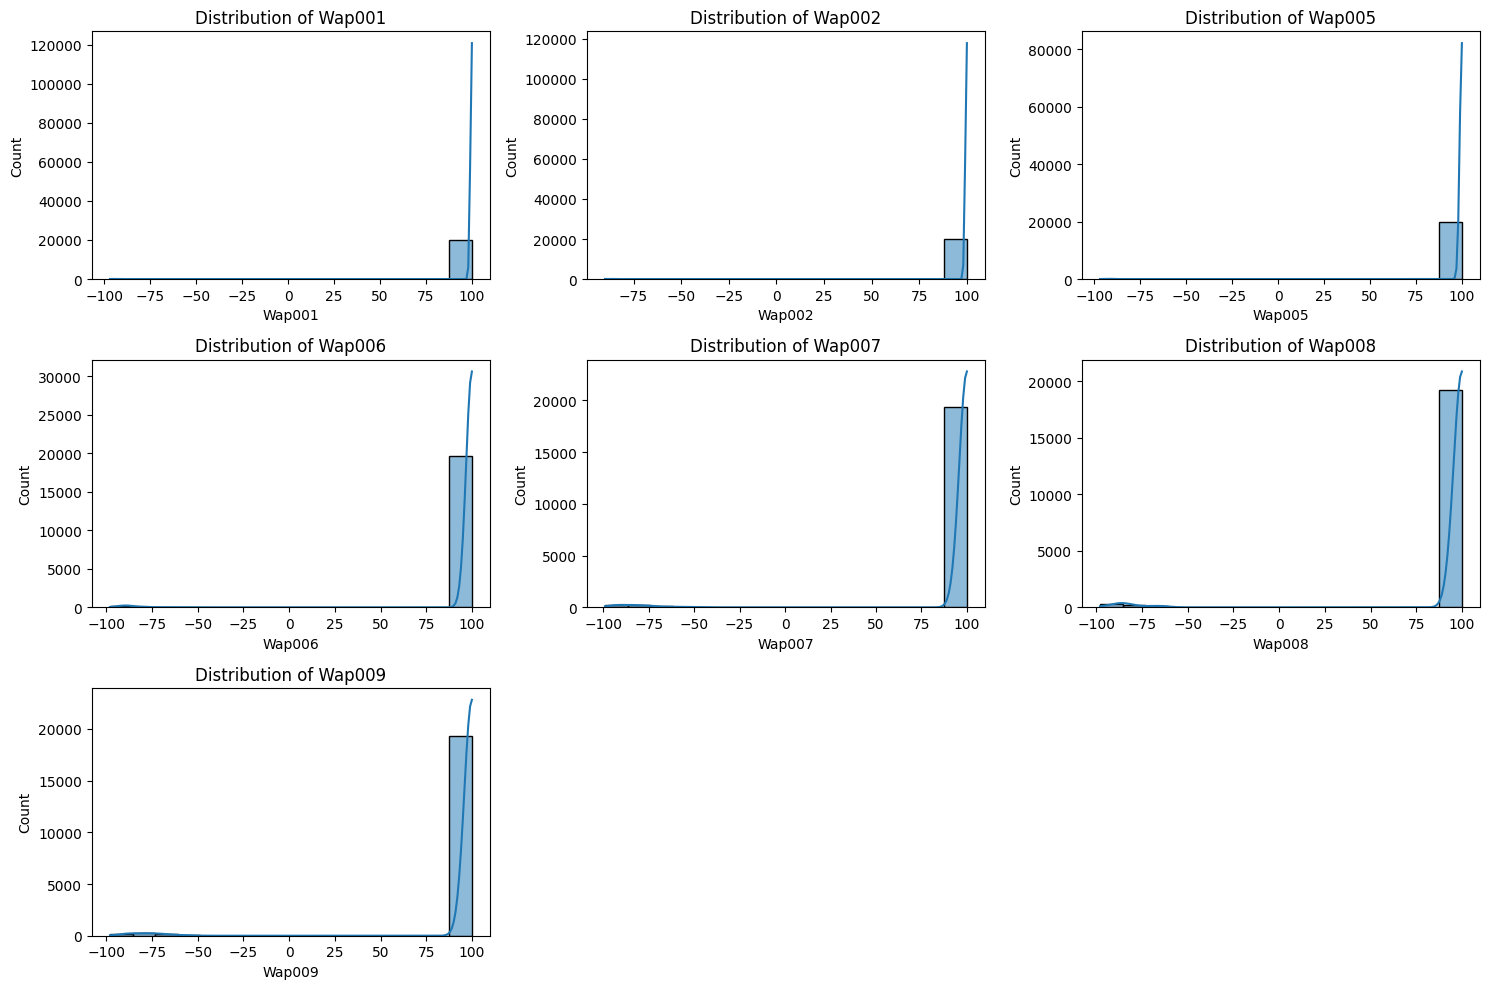

In [ ]:
features = Final_Data[[	'WAP001',	'WAP002',	'WAP005',	'WAP006',	'WAP007',	'WAP008',	'WAP009']]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=Training_dataset, x=feature, kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

I.2 PRE-PROCESSING:
* Check for NAN values
* Feature normalization and selection

In [6]:
nan_values = Final_Data.isna().sum()

# Print the columns with NaN values
columns_with_nan = nan_values[nan_values > 0]
if not columns_with_nan.empty:
    print("Columns with NaN values:")
    print(columns_with_nan)
else:
    print("No NaN values found in the dataset.")
    print(Final_Data.shape)

No NaN values found in the dataset.
(21048, 529)


1. Features Normalization:
* we appllied a custom scaling where we specify manualy the range and we then applied the min max normalisation to handle the special value since the dataset provided the rssi values in the range of -104 to 0 and 100 as a special values that means the RSSI was not collected and so considered as a bad average point , so we change the special value to a Good Average Point by replace it to -104 then Normalize features scale. As -104 is the lowest RSSI value, it will not impact strongly the origine data and will allow model generalization without bad average  point since is the lowest RSSI value. this method helped us to  to handle the problem related special value.
* we normalize also the target variables to the range of [0-1] to facilitate the computation

2. feature selection :
- as we are working on wify fingerprinting,we have selected only the 520 access points as features that will be use to predict user location.
- for the location we selected the longitude and the latitude since the IPS is based on taking the X,Y axis position of a specific object given an enviroment

3. ENTIRE DATASET LOCALIZATION:
- we plot the entire localization of the dataset by getting the relative position of each object of on that environement.

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

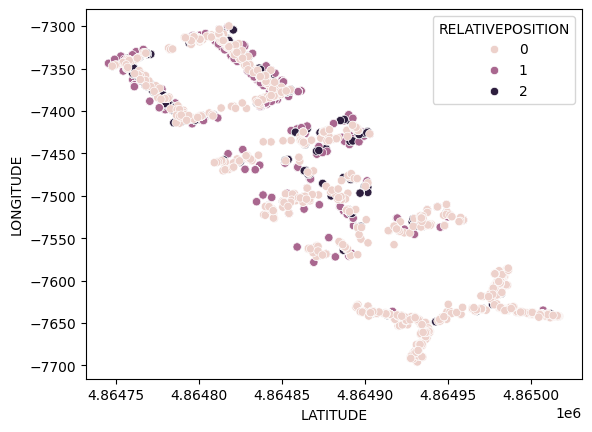

In [7]:
x = Final_Data.drop(columns=['BUILDINGID', 'FLOOR','SPACEID','TIMESTAMP','USERID',	'PHONEID'])

sns.scatterplot(x = 'LATITUDE', y = 'LONGITUDE',hue = 'RELATIVEPOSITION', data = x)

In [17]:

X_train = Final_Data.drop(columns=['BUILDINGID', 'FLOOR','SPACEID','RELATIVEPOSITION','TIMESTAMP','LONGITUDE','USERID',	'PHONEID'	,'LATITUDE'])


def custom_scaling(X, min_value=-104, max_value=0, special_value=100, replacement_value=-104):
    # we Replace the special value (100) to (-104)
    X = np.where(X == special_value, replacement_value, X)

    # then we Perform scaling: scale values from the range [min_value, max_value] to [0, 1]
    X_scaled = (X - min_value) / (max_value - min_value)

    return X_scaled


X_scaled = custom_scaling(X_train, min_value=-104, max_value=0, special_value=100,replacement_value=-104)

#target variables normalization :  longitude and latitude n

scaler = MinMaxScaler()

Final_Data[['LONGITUDE','LATITUDE']] = scaler.fit_transform(Final_Data[['LONGITUDE','LATITUDE']])

x = X_scaled
y = Final_Data[['LONGITUDE','LATITUDE']]

# dataset split  for training and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

II. Model implementation

II.1 Machine Learning Model : RandomForest Regressor:


In [18]:
# Train a Random Forest Regressor
RF_model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)

# Model Evaluation
# Prediction on unseen set
y_pred = RF_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#Overall Evaluation
print("overal evaluation")
print()
print(f"MAE : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")
print()
# evaluation for longitude
mae_long = mean_absolute_error(y_test['LONGITUDE'], y_pred[:, 0])
mse_long = mean_squared_error(y_test['LONGITUDE'], y_pred[:, 0])
rmse_long = np.sqrt(mse_long)
print("longitude  evaluation")
print()
print(f"Long_MAE: {mae_long}")
print(f"Long_MSE: {mse_long}")
print(f"Long_RMSE: {rmse}")
print()
# evaluation for latitude
mae_lat = mean_absolute_error(y_test['LATITUDE'], y_pred[:, 1])
mse_lat = mean_squared_error(y_test['LATITUDE'], y_pred[:, 1])
rmse_lat = np.sqrt(mse_lat)
print("latitude evaluation")
print()
print()
print(f"Lat_MAE: {mae_lat}")
print(f"Lat_MSE: {mse_lat}")
print(f"Lat_RMSE: {rmse_lat}")

overal evaluation

MAE : 0.008766569038718058
MSE : 0.00045793655818742964
RMSE : 0.021399452287089723

longitude  evaluation

Long_MAE: 0.007822149911745195
Long_MSE: 0.0004010277694759334
Long_RMSE: 0.021399452287089723

latitude evaluation


Lat_MAE: 0.009710988165690892
Lat_MSE: 0.0005148453468989259
Lat_RMSE: 0.022690203765037588


In [10]:
R2_score = RF_model.score(X_test, y_test)


#r2_scorre
print(f"score: {R2_score}")
print( )

#Prediction Ground_Truth
print("predicted Ground_Truth values encoded: ")
print()
print(y_pred)
print()

# decode the predictions and ground truth values to original scale
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)

print("Predicted Ground truth values decoded :")
print()
print(y_pred_orig)
print()
print()

print("Ground truth original values :")
print()
print(y_test_orig )
print()
print()
grndt_pred_diff  = y_test_orig - y_pred_orig

print("ground truth/prediction difference :")
print()
print(grndt_pred_diff)
print()
print()
# Calculate Mean Euclidean Distance
euclidean_distances = np.linalg.norm(y_test_orig - y_pred_orig, axis=1)
mean_euclidean_distance = np.mean(euclidean_distances)
print(f"Mean Euclidean Distance: {mean_euclidean_distance}")


score: 0.9937802648837861

predicted Ground_Truth values encoded: 

[[0.09002786 0.7066065 ]
 [0.89046863 0.2993397 ]
 [0.95862904 0.26160726]
 ...
 [0.02984612 0.6797302 ]
 [0.89934275 0.06293113]
 [0.83358645 0.35034134]]

Predicted Ground truth values decoded :

[[  -7660.27401777 4864937.67323797]
 [  -7343.17761309 4864827.05156566]
 [  -7316.17571425 4864816.80269417]
 ...
 [  -7684.11514698 4864930.37310787]
 [  -7339.66211025 4864762.83834789]
 [  -7365.711619   4864840.904615  ]]


Ground truth original values :

[[  -7661.7531     4864938.2754    ]
 [  -7338.48883333 4864824.72436667]
 [  -7316.8814     4864818.2775    ]
 ...
 [  -7683.8559     4864930.3579    ]
 [  -7336.9443     4864764.0393    ]
 [  -7366.2424     4864841.108     ]]


ground truth/prediction difference :

[[-1.47908223  0.60216203]
 [ 4.68877976 -2.327199  ]
 [-0.70568575  1.47480584]
 ...
 [ 0.25924698 -0.01520787]
 [ 2.71781025  1.20095212]
 [-0.530781    0.203385  ]]


Mean Euclidean Distance: 4.4374077

In [14]:
# Reshape for Conv1D (samples, steps, features)
X_train_scaled_reshaped = x.reshape(x.shape[0], x.shape[1], 1)

# we split the dataset of training and we retain 20 %for validation and test
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled_reshaped, y, test_size=0.2, random_state=42, shuffle=True)

In [16]:

def Conv1D_NN(input_shape):
    model = models.Sequential([
        layers.Conv1D(64, kernel_size=7, activation='relu', input_shape=input_shape),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(2, activation='linear')
    ])
    return model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
learning_rate =0.001
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
# Model training
cnn_model = Conv1D_NN(input_shape=(520, 1))
cnn_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
history= cnn_model.fit(X_train, y_train, epochs=120, batch_size=64, validation_split=0.2,callbacks=[reduce_lr], shuffle=True)

#final evaluation
cnn_y_pred = cnn_model.predict(X_test)
# evaluation metrics
mae = mean_absolute_error(y_test, cnn_y_pred)
mse = mean_squared_error(y_test, cnn_y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print( )
print(f"Mean Squared Error (MSE): {mse}")
print( )
print(f"Root Mean Squared Error (RMSE): {rmse}")
print()
print("predicted Groundtruth  values encoded :")
print(cnn_y_pred)

# decode predictions and ground truth values to original scale
CNN_y_test = scaler.inverse_transform(y_test)
CNN_y_pred = scaler.inverse_transform(cnn_y_pred )

print(" Predicted Ground truth values decoded:")
print()
print(CNN_y_pred)
print()
print()

print(" Ground truth original values:")
print()
print(CNN_y_test)
print()
print()

grndt_pred_diff  = CNN_y_test- CNN_y_pred
print("ground truth/prediction difference :")
print()
print(grndt_pred_diff)
print()
print()
#  Mean Euclidean Distance
euclidean_distances = np.linalg.norm(CNN_y_test- CNN_y_pred, axis=1)
mean_euclidean_distance = np.mean(euclidean_distances)
print(f"Mean Euclidean Distance: {mean_euclidean_distance}")


Epoch 1/120
211/211 [==============================] - 15s 68ms/step - loss: 0.0096 - mae: 0.0511 - val_loss: 0.0012 - val_mae: 0.0253 - lr: 0.0010
Epoch 2/120
211/211 [==============================] - 14s 68ms/step - loss: 0.0010 - mae: 0.0224 - val_loss: 8.1498e-04 - val_mae: 0.0195 - lr: 0.0010
Epoch 3/120
211/211 [==============================] - 14s 69ms/step - loss: 8.4356e-04 - mae: 0.0200 - val_loss: 6.9288e-04 - val_mae: 0.0175 - lr: 0.0010
Epoch 4/120
211/211 [==============================] - 14s 68ms/step - loss: 8.1232e-04 - mae: 0.0192 - val_loss: 8.5688e-04 - val_mae: 0.0208 - lr: 0.0010
Epoch 5/120
211/211 [==============================] - 15s 69ms/step - loss: 7.4973e-04 - mae: 0.0184 - val_loss: 0.0011 - val_mae: 0.0228 - lr: 0.0010
Epoch 6/120
211/211 [==============================] - 15s 69ms/step - loss: 7.5716e-04 - mae: 0.0184 - val_loss: 7.3970e-04 - val_mae: 0.0182 - lr: 0.0010
Epoch 7/120
211/211 [==============================] - 15s 71ms/step - loss: 6.8

1.1 CONCLUSION :
- Indor Positioning System is a interresting topic that help to localize subject or device on indoor environemnt so IPS providing several methode to achieve the best result. in our case we've used passive fingerprinting. which stand for using severals RSSI collected by Wireless Access Point on an indoor enviroment that helped us to get the location of the object on that environement.
- we used the UjiIndoorLoc dataset that provided us addidtional information for a better prediction but as we've focused on the RSSI so we used only Rssi features to predict object localisation, so X and Y axis(longigtude and latitude).
we implemented two models: deep learning model Multi Layer Perceptron and machine learing model Random Forest Regressor as baseline model.expecting that the deep learning model to be more accurate than the machine learning model, we've used the Mean Square Error as  metric cause it help us to observe how good is the model prediction on unseen data expressing the prediction error.
* we commpared the both result and as you can noticed the 1DCNN has a lowest MSE which means the 1DCNN performed more than 5% of a good prediction than the RF_R.  
1. RF_R : MSE : 0.00045382832567200643
2. 1DCNN : MSE : 0.00040119883909340084
* we used also the Mean Eucludian distance to observe the distance difference between the Ground truth and the prediction to evaluate the model prediction where a lower Mean Euclidean Distance indicates that the predictions are closer to the actual values, hence more accurate. Conversely, a higher value indicates less accuracy.  based on this we have got the aproximately the same result between our two model.
3. R_F_MED : 4.43740775332222
4. 1DCNN_MED : 4.9236552278774095

1.2 FUTURE DIRECTION

- So based on Regression task where the best model is the one that provide the lowest MSE and as expeting the result on our project, the 1D Convolution Model as performed a greater prediction than the Random Forest Regressor  Model by providing the lowest MSE . but observing the equality of the Mean Euclidean Distance of the two models, we'll go forward on model advancement to have higest result than the one we've got by use of more advanced technics.